# AutoDiff Model

In [2]:
import sys
import os

# Define the path to your folder
folder_path = r"C:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion"

# Add the folder to sys.path
sys.path.append(folder_path)

In [3]:
import numpy as np
#import process_edited as pce
import process_GQ as pce
import autoencoder as ae
import diffusion as diff
import TabDDPMdiff as TabDiff
import pandas as pd
import torch
import os
import time
import numpy as np
strings_set = {'diabetes'}
# strings_set = {'abalone', 'adult', 'Churn_Modelling','faults', 'indian_liver_patient', 
#                'insurance', 'News', 'Obesity', 'Shoppers', 'Titanic', 'wilt', 'Bean', 'nursery', 'Magic', 'HTRU'}
Model = 'AutoDiff'

for string in strings_set:
    filename = f'Real_Data/{string}.csv'
    # Read dataframe
    print(filename)
    real_df = pd.read_csv(filename)
    #real_df = real_df.drop('url', axis=1)
    # Step 2: Inspect the data and check for class imbalance
    # Assuming the last column is the label, and the rest are features
    X = real_df.iloc[:, :-1].values  # Features
    y = real_df.iloc[:, -1].values  # Labels (binary classification)
     # Separate the minority class
    real_minortiy = real_df[y == 1]
    
    threshold = 0.01 # Threshold for mixed-type variables
    parser = pce.DataFrameParser().fit(real_minortiy, threshold)
    ################################################################################################################
    # Auto-encoder hyper-parameters
    device = 'cuda' #@param {'type':'string'}
    n_epochs = 100 #@param {'type':'integer'}
    eps = 1e-5 #@param {type:"number"}
    weight_decay = 1e-6 #@param {'type':'number'}
    maximum_learning_rate = 1e-2 #@param {'type':'number'}
    lr = 2e-4 #@param {'type':'number'}
    hidden_size = 250
    num_layers = 3
    batch_size = 50

    ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
    latent_features = ds[1].detach()

    ################################################################################################################
    # diffusion hyper-parameters
    diff_n_epochs = 100 #@param {'type':'integer'}
    hidden_dims = (256, 512, 1024, 512, 256) #@param {type:"raw"}
    converted_table_dim = latent_features.shape[1] #@param {'type':'integer'}
    sigma = 20  #@param {'type':'integer'} 
    num_batches_per_epoch = 50 #@param {'type':'number'}
    batch_size = 50 #@param {'type':'integer'}
    T = 100  #@param {'type':'integer'}

    score = TabDiff.train_diffusion(latent_features, T, eps, sigma, lr, 
                        num_batches_per_epoch, maximum_learning_rate, weight_decay, diff_n_epochs, batch_size)

############################################################################################################### 

Real_Data/diabetes.csv


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\TabDDPMdiff.py:270: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)
c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\TabDDPMdiff.py:276: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


### Same code with timer decorator

In [1]:
import numpy as np
import process_GQ as pce
import autoencoder as ae
import TabDDPMdiff as TabDiff
import pandas as pd
import torch
import time

# Decorator to measure execution time
def timer(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"{func.__name__} ran in {end - start:.2f} seconds")
        return result
    return wrapper

@timer
def process_and_train(strings_set, model, threshold=0.01, device='cuda'):
    for string in strings_set:
        filename = f'Real_Data/{string}.csv'
        # Read dataframe
        print(f"Processing file: {filename}")
        real_df = pd.read_csv(filename)

        # Features and labels (binary classification, assuming last column is label)
        X = real_df.iloc[:, :-1].values
        y = real_df.iloc[:, -1].values

        # Separate the minority class
        real_minortiy = real_df[y == 1]
        
        # Parse the minority data
        parser = pce.DataFrameParser().fit(real_minortiy, threshold)
        
        # Auto-encoder hyper-parameters
        n_epochs = 100
        eps = 1e-5
        weight_decay = 1e-6
        maximum_learning_rate = 1e-2
        lr = 2e-4
        hidden_size = 250
        num_layers = 3
        batch_size = 50

        # Train the autoencoder
        ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
        latent_features = ds[1].detach()

        # Diffusion hyper-parameters
        diff_n_epochs = 100
        hidden_dims = (256, 512, 1024, 512, 256)
        converted_table_dim = latent_features.shape[1]
        sigma = 20
        num_batches_per_epoch = 50
        T = 100

        # Train diffusion model
        score = TabDiff.train_diffusion(latent_features, T, eps, sigma, lr,
                                        num_batches_per_epoch, maximum_learning_rate, weight_decay, diff_n_epochs, batch_size)
        print(f"Training completed for dataset: {string}")
        return score

# Set parameters and execute the function
strings_set = {'diabetes'}
Model = 'AutoDiff'

process_and_train(strings_set, Model)


Processing file: Real_Data/diabetes.csv


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\TabDDPMdiff.py:270: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)
c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\TabDDPMdiff.py:276: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


Training completed for dataset: diabetes
process_and_train ran in 25.49 seconds


MLPDiffusion(
  (mlp): MLP(
    (blocks): ModuleList(
      (0): Block(
        (linear): Linear(in_features=128, out_features=256, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (1): Block(
        (linear): Linear(in_features=256, out_features=256, bias=True)
        (activation): ReLU()
        (dropout): Dropout(p=0.0, inplace=False)
      )
    )
    (head): Linear(in_features=256, out_features=13, bias=True)
  )
  (proj): Linear(in_features=13, out_features=128, bias=True)
  (time_embed): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): SiLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
  )
)

In [5]:
type(score)

TabDDPMdiff.MLPDiffusion

In [6]:
T = 300; N = latent_features.shape[0]; P = latent_features.shape[1]
sample = diff.Euler_Maruyama_sampling(score, T, N, P, device)

  0%|          | 0/300 [00:00<?, ?it/s]

c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\diffusion.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)
c:\Users\Tawfique\Thesis\Data_Augmentation\Other Models\AutoDiffusion\diffusion.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


In [8]:
print(type(sample))
sample.shape

<class 'torch.Tensor'>


torch.Size([268, 13])

In [ ]:
duration = end_time - start_time

time_duration.append(duration)

gen_output = ds[0](sample, ds[2], ds[3])
gen_df = pce.convert_to_table(real_minortiy, gen_output, threshold)
selected_samples = gen_df.sample(n=100, random_state=42)  # For reproducibility
# Syn _df will be the dataset after augmentation
syn_df = pd.concat([real_df, selected_samples], ignore_index=True)
output_directory = os.getcwd()+f'/{string}/'
filename = f'{Model}_{string}_Augmented.csv'

output_file = os.path.join(output_directory, filename)
syn_df.to_csv(output_file, index=False) 

  0%|          | 0/300 [00:00<?, ?it/s]

c:\Users\Tawfique\Thesis\AutoDiffusion\Codes + Descriptions\diffusion.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)
c:\Users\Tawfique\Thesis\AutoDiffusion\Codes + Descriptions\diffusion.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


#### Access Real & Syntetic Dataset that are already Stored

##### No need to run the model if you already have run it once for the dataset

In [35]:
import numpy as np
import pandas as pd

string = 'diabetes'
Model = 'AutoDiff'

filename = f'Real_Data/{string}.csv'
real_df = pd.read_csv(filename)
syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

syn_df = pd.read_csv(syn_filename)

syn_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,0.000000,33.600000,0.627000,50.000000,1.0
1,1,85.000000,66.000000,29.000000,0.000000,26.600000,0.351000,31.000000,0.0
2,8,183.000000,64.000000,0.000000,0.000000,23.300000,0.672000,32.000000,1.0
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21.000000,0.0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33.000000,1.0
...,...,...,...,...,...,...,...,...,...
863,5,119.976410,68.000000,40.702263,150.123917,32.379799,0.551422,37.227985,1.0
864,3,109.848259,82.000000,18.275486,0.000000,37.481720,2.130903,40.087616,1.0
865,10,130.651215,0.020425,0.000000,0.000000,32.296051,0.446737,33.716751,1.0
866,12,146.035049,70.000000,4.396682,0.000000,31.104616,0.252130,58.464581,1.0


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score
# Load datasets
string = 'diabetes'
Model = 'AutoDiff'

filename = f'Real_Data/{string}.csv'
real_df = pd.read_csv(filename)
syn_filename = f'{string}/{Model}_{string}_Augmented.csv'

real_df = pd.read_csv(filename)
augmented_df = pd.read_csv(syn_filename)

X = real_df.iloc[:, :-1].values  # Features
y = real_df.iloc[:, -1].values 
# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")# Labels (binary classification)

X_balanced = augmented_df.iloc[:, :-1].values  # Features
y_balanced = augmented_df.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Step 6: Split the dataset into training and test sets (original and balanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 7: Train a simple classifier on both original and generated datasets
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 8: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recalls_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

# Step 9: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recalls_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")
print("Classification Report (original data):\n", classification_report(y_test_orig, y_pred_orig))
print("Classification Report (generated data):\n", classification_report(y_test_orig, y_pred_bal))


print(f"Number of fake samples generated: {len(augmented_df)-len(real_df)}")

Class distribution before augmentation: {0: 500, 1: 268}
Class distribution before augmentation: {0: 500, 1: 268}
Recall score (original data): 0.6625
Recall score (generated data): 0.8625
F1 score (original data): 0.6503
F1 score (generated data): 0.8023
Classification Report (original data):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

Classification Report (generated data):
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       151
           1       0.75      0.86      0.80        80

    accuracy                           0.85       231
   macro avg       0.84      0.86      0.84       231
weighted avg       0.86      0.85      0.85       231

Number of

# Forest Diffusion

#### 100 minority instances generation

Class distribution before augmentation: {0: 500, 1: 268}


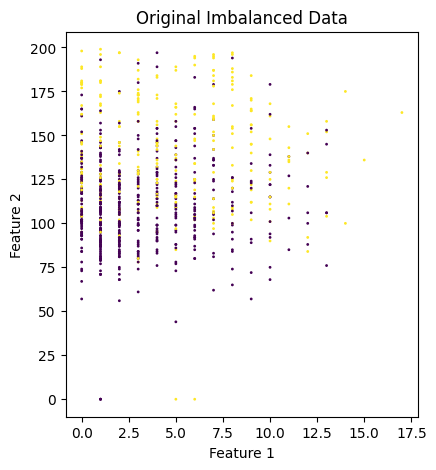

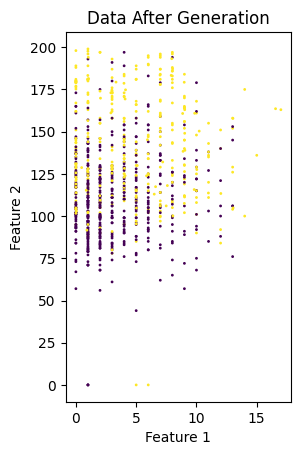

Class distribution after augmentation: {0.0: 500, 1.0: 368}
Recall score (original data): 0.6625
Recall score (generated data): 0.8000
F1 score (original data): 0.6503
F1 score (generated data): 0.7665
Classification Report (original data):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231

Classification Report (generated data):
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       151
           1       0.74      0.80      0.77        80

    accuracy                           0.83       231
   macro avg       0.81      0.82      0.82       231
weighted avg       0.84      0.83      0.83       231

Number of fake samples generated: 100


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from ForestDiffusion import ForestDiffusionModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score

# Step 1: Load the CSV file
strings_set = {'diabetes'}
filename = f'Real_Data/{string}.csv'
data = pd.read_csv(filename)

# Step 2: Inspect the data and check for class imbalance
# Assuming the last column is the label, and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values  # Labels (binary classification)

# Check and print the original class distribution
unique, counts = np.unique(y, return_counts=True)
class_dist_before = dict(zip(unique, counts))
print(f"Class distribution before augmentation: {class_dist_before}")

# Separate the minority class
X_minority = X[y == 1]
# Identify integer columns
int_columns = data.select_dtypes(include=['int']).columns
int_indexes = []
for col in int_columns:
    col_index = data.columns.get_loc(col)
    int_indexes.append(col_index)
# Step 4: Upsample the minority class using ForestDiffusionModel
forest_model = ForestDiffusionModel(X_minority, label_y=None, n_t=50, duplicate_K=100, bin_indexes=[], cat_indexes=[], int_indexes=int_indexes, diffusion_type='flow', n_jobs=-1)
X_minority_fake = forest_model.generate(batch_size=100)  # Adjust the batch size to create a balanced dataset

# Add generated samples to the main imbalanced dataset
X_balanced = np.concatenate((X, X_minority_fake), axis=0)
y_balanced = np.concatenate((y, np.ones(X_minority_fake.shape[0])), axis=0)


# Check and print the class distribution after augmentation
unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
class_dist_after = dict(zip(unique_bal, counts_bal))
print(f"Class distribution after augmentation: {class_dist_after}")

# Step 6: Split the dataset into training and test sets (original and balanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Step 7: Train a simple classifier on both original and generated datasets
clf_orig = RandomForestClassifier(random_state=42)
clf_orig.fit(X_train_orig, y_train_orig)

clf_bal = RandomForestClassifier(random_state=42)
clf_bal.fit(X_train_bal, y_train_bal)

# Step 8: Predict and calculate recall and F1 scores
y_pred_orig = clf_orig.predict(X_test_orig)
y_pred_bal = clf_bal.predict(X_test_orig)

recall_orig = recall_score(y_test_orig, y_pred_orig)
recalls_bal = recall_score(y_test_orig, y_pred_bal)

f1_orig = f1_score(y_test_orig, y_pred_orig)
f1_bal = f1_score(y_test_orig, y_pred_bal)

# Step 9: Print the performance metrics
print(f"Recall score (original data): {recall_orig:.4f}")
print(f"Recall score (generated data): {recalls_bal:.4f}")
print(f"F1 score (original data): {f1_orig:.4f}")
print(f"F1 score (generated data): {f1_bal:.4f}")
print("Report_Forest Diffusion (original data):\n", classification_report(y_test_orig, y_pred_orig))
print("Report_Forest Diffusion (generated data):\n", classification_report(y_test_orig, y_pred_bal))

# Step 10: Print the number of fake samples generated
print(f"Number of fake samples generated: {len(X_minority_fake)}")

# Attemp: Autoencoder on Forest

In [ ]:
import numpy as np
#import process_edited as pce
import process_GQ as pce
import autoencoder as ae
import diffusion as diff
import TabDDPMdiff as TabDiff
import pandas as pd
import torch
import os
import time
import numpy as np
strings_set = {'diabetes'}
# strings_set = {'abalone', 'adult', 'Churn_Modelling','faults', 'indian_liver_patient', 
#                'insurance', 'News', 'Obesity', 'Shoppers', 'Titanic', 'wilt', 'Bean', 'nursery', 'Magic', 'HTRU'}
Model = 'AutoDiff'

for string in strings_set:
    filename = f'Real_Data/{string}.csv'
    # Read dataframe
    print(filename)
    real_df = pd.read_csv(filename)
    #real_df = real_df.drop('url', axis=1)
    # Step 2: Inspect the data and check for class imbalance
    # Assuming the last column is the label, and the rest are features
    X = real_df.iloc[:, :-1].values  # Features
    y = real_df.iloc[:, -1].values  # Labels (binary classification)
     # Separate the minority class
    real_minortiy = real_df[y == 1]
    
    threshold = 0.01 # Threshold for mixed-type variables
    parser = pce.DataFrameParser().fit(real_minortiy, threshold)
    ################################################################################################################
    # Auto-encoder hyper-parameters
    device = 'cuda' #@param {'type':'string'}
    n_epochs = 5000 #@param {'type':'integer'}
    eps = 1e-5 #@param {type:"number"}
    weight_decay = 1e-6 #@param {'type':'number'}
    maximum_learning_rate = 1e-2 #@param {'type':'number'}
    lr = 2e-4 #@param {'type':'number'}
    hidden_size = 250
    num_layers = 3
    batch_size = 50

    ds = ae.train_autoencoder(real_minortiy, hidden_size, num_layers, lr, weight_decay, n_epochs, batch_size, threshold)
    latent_features = ds[1].detach()

    ################################################################################################################
    # diffusion hyper-parameters
    diff_n_epochs = 5000 #@param {'type':'integer'}
    hidden_dims = (256, 512, 1024, 512, 256) #@param {type:"raw"}
    converted_table_dim = latent_features.shape[1] #@param {'type':'integer'}
    sigma = 20  #@param {'type':'integer'} 
    num_batches_per_epoch = 50 #@param {'type':'number'}
    batch_size = 50 #@param {'type':'integer'}
    T = 100  #@param {'type':'integer'}

    score = TabDiff.train_diffusion(latent_features, T, eps, sigma, lr, \
                        num_batches_per_epoch, maximum_learning_rate, weight_decay, diff_n_epochs, batch_size)

############################################################################################################### 